In [ ]:
!pip install bagpy

In [ ]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import sys
from scipy import stats
import random
from scipy.optimize import curve_fit
from numpy import arange

In [ ]:
!pip install pyproj
import pyproj

In [ ]:
#reading the data from bag file and converting into the panda data frame librabry
# movbgfree=bagreader('/home/abhinav/catkin_ws/src/LAB1/src/data/walking_data.bag')
# statbgfree=bagreader('/home/abhinav/catkin_ws/src/LAB1/src/data/stationary_data.bag')
# movbgoccl=bagreader('/home/abhinav/catkin_ws/src/LAB1/src/data/walking_data.bag')
# statbgoccl=bagreader('/home/abhinav/catkin_ws/src/LAB1/src/data/stationary_data_afternoon.bag')

movbgfree=bagreader('walking_data.bag')
statbgfree=bagreader('stationary_data.bag')
movbgoccl=bagreader('Moving_occluded.bag')
statbgoccl=bagreader('stationary_data_occ.bag')

movfree = movbgfree.message_by_topic('/gps')
statfree = statbgfree.message_by_topic('/gps')
movoccl = movbgoccl.message_by_topic('/gps')
statoccl = statbgoccl.message_by_topic('/gps')

In [ ]:
df_movefree = pd.read_csv('walking_data/gps.csv')
df_statfree = pd.read_csv('stationary_data/gps.csv')

df_moveoccl = pd.read_csv('Moving_occluded/gps.csv')
df_statoccl = pd.read_csv('stationary_data_occ/gps.csv')

In [ ]:
df_movefree
# print(df_movefree.shape)
# print(df_movefree['utm_easting'], df_moveoccl['UTM_easting'])

,Time,gps_header.seq,gps_header.stamp.secs,gps_header.stamp.nsecs,gps_header.frame_id,latitude,longitude,altitude,utm_easting,utm_northing,zone,grid
0,1.663940e+09,0,48346,0,GPS1_Frame,42.312648,-71.096448,52.1,7225.942068,6618.498718,19,T
1,1.663940e+09,0,48347,0,GPS1_Frame,42.312648,-71.096448,52.1,7225.942068,6618.498718,19,T
2,1.663940e+09,0,48348,0,GPS1_Frame,42.312657,-71.096455,52.4,7225.415429,6619.437608,19,T
3,1.663940e+09,0,48349,0,GPS1_Frame,42.312663,-71.096465,53.1,7224.609510,6620.198197,19,T
4,1.663940e+09,0,48350,0,GPS1_Frame,42.312665,-71.096473,53.3,7223.927268,6620.400192,19,T
...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.663940e+09,0,48941,0,GPS1_Frame,42.316740,-71.101272,26.4,6839.643453,7082.653104,19,T
596,1.663940e+09,0,48942,0,GPS1_Frame,42.316747,-71.101277,26.4,6839.249684,7083.403563,19,T
597,1.663940e+09,0,48943,0,GPS1_Frame,42.316755,-71.101283,26.4,6838.723135,7084.342485,19,T
598,1.663940e+09,0,48944,0,GPS1_Frame,42.316762,-71.101288,26.8,6838.329367,7085.092944,19,T


In [ ]:
print(df_moveoccl.keys().tolist())
print(df_movefree.keys().tolist())
print(df_statfree.keys().tolist())
print(df_statoccl.keys().tolist())

['Time', 'Header.seq', 'Header.stamp.secs', 'Header.stamp.nsecs', 'Header.frame_id', 'Latitude', 'Longitude', 'Altitude', 'UTM_easting', 'UTM_northing', 'Zone', 'Letter']
['Time', 'gps_header.seq', 'gps_header.stamp.secs', 'gps_header.stamp.nsecs', 'gps_header.frame_id', 'latitude', 'longitude', 'altitude', 'utm_easting', 'utm_northing', 'zone', 'grid']
['Time', 'gps_header.seq', 'gps_header.stamp.secs', 'gps_header.stamp.nsecs', 'gps_header.frame_id', 'latitude', 'longitude', 'altitude', 'utm_easting', 'utm_northing', 'zone', 'grid']
['Time', 'Header.seq', 'Header.stamp.secs', 'Header.stamp.nsecs', 'Header.frame_id', 'Latitude', 'Longitude', 'Altitude', 'UTM_easting', 'UTM_northing', 'Zone', 'Letter']


In [ ]:
my_gps_data_utm_e = df_movefree.utm_easting.to_numpy()
my_gps_data_utm_n = df_movefree.utm_northing.to_numpy()
my_gps_data_utm_t = df_movefree['gps_header.stamp.secs'].to_numpy()

my_gps_data_utm_e1 = df_statfree.utm_easting.to_numpy()
my_gps_data_utm_n1 = df_statfree.utm_northing.to_numpy()
my_gps_data_utm_t1 = df_statfree['gps_header.stamp.secs'].to_numpy()

my_gps_data_utm_e2 = df_moveoccl.UTM_easting.to_numpy()
my_gps_data_utm_n2 = df_moveoccl.UTM_northing.to_numpy()
my_gps_data_utm_t2 = df_moveoccl['Header.stamp.secs'].to_numpy()

my_gps_data_utm_e3 = df_statoccl.UTM_easting.to_numpy()
my_gps_data_utm_n3 = df_statoccl.UTM_northing.to_numpy()
my_gps_data_utm_t3 = df_statoccl['Header.stamp.secs'].to_numpy()

my_altitude_mf = df_movefree['altitude'].to_numpy()
my_altitude_mo = df_moveoccl['Altitude'].to_numpy()

In [ ]:
for every_element in range (0,len(my_gps_data_utm_e)):
   my_gps_data_utm_e[every_element] = my_gps_data_utm_e[every_element]%10000
for every_element in range (0,len(my_gps_data_utm_n)):
  my_gps_data_utm_n[every_element] = my_gps_data_utm_n[every_element]%10000

for every_element in range (0,len(my_gps_data_utm_e1)):
   my_gps_data_utm_e1[every_element] = my_gps_data_utm_e1[every_element]%100
for every_element in range (0,len(my_gps_data_utm_n1)):
  my_gps_data_utm_n1[every_element] = my_gps_data_utm_n1[every_element]%100

for every_element in range (0,len(my_gps_data_utm_e2)):
   my_gps_data_utm_e2[every_element] = my_gps_data_utm_e2[every_element]%10000
for every_element in range (0,len(my_gps_data_utm_n2)):
  my_gps_data_utm_n2[every_element] = my_gps_data_utm_n2[every_element]%10000

for every_element in range (0,len(my_gps_data_utm_e3)):
   my_gps_data_utm_e3[every_element] = my_gps_data_utm_e3[every_element]
for every_element in range (0,len(my_gps_data_utm_n3)):
  my_gps_data_utm_n3[every_element] = my_gps_data_utm_n3[every_element]


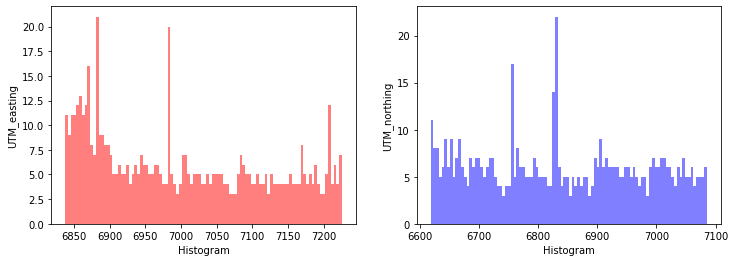

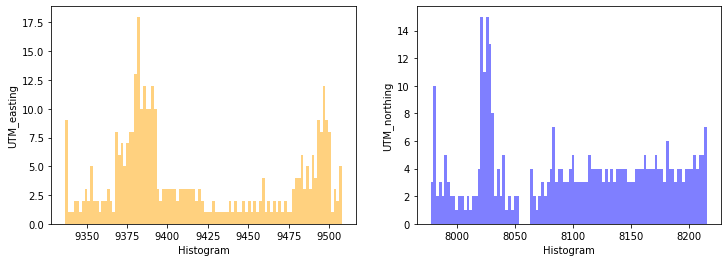

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#for the walking data in the free spcae
ax[0].set(xlabel="Histogram",ylabel="UTM_easting")
ax[0].hist(my_gps_data_utm_e, bins=100,color='red',alpha=0.5, label='UTM_easting(free space)')
ax[1].set(xlabel="Histogram",ylabel="UTM_northing")
ax[1].hist(my_gps_data_utm_n, bins=100,color='blue',alpha=0.5, label='UTM_northing(free space)')


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#for the walking data in the occ space
ax[0].set(xlabel="Histogram",ylabel="UTM_easting")
ax[0].hist(my_gps_data_utm_e2, bins=100,color='orange',alpha=0.5,label='UTM_easting(occ space)')
ax[1].set(xlabel="Histogram",ylabel="UTM_northing", label='UTM_northing(occ_space)')
ax[1].hist(my_gps_data_utm_n2, bins=100,color='blue',alpha=0.5,label='UTM_northing(occ space)')
plt.show()


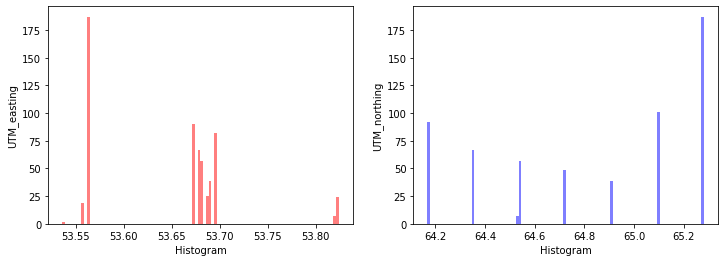

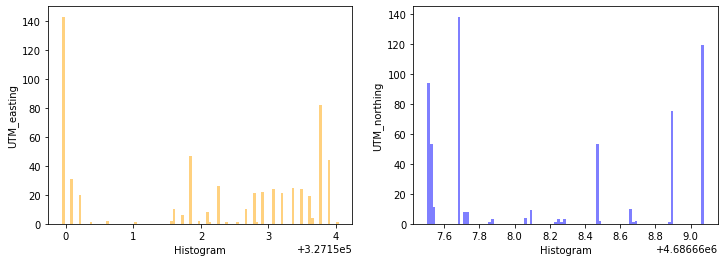

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#for the stationary data in the free spcae
ax[0].set(xlabel="Histogram",ylabel="UTM_easting")
ax[0].hist(my_gps_data_utm_e1, bins=100,color='red',alpha=0.5, label='UTM_easting(free space)')
ax[1].set(xlabel="Histogram",ylabel="UTM_northing")
ax[1].hist(my_gps_data_utm_n1, bins=100,color='blue',alpha=0.5, label='UTM_northing(free space)')


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#for the staionary data in the occ space
ax[0].set(xlabel="Histogram",ylabel="UTM_easting")
ax[0].hist(my_gps_data_utm_e3, bins=100,color='orange',alpha=0.5,label='UTM_easting(occ space)')
ax[1].set(xlabel="Histogram",ylabel="UTM_northing", label='UTM_northing(occ_space)')
ax[1].hist(my_gps_data_utm_n3, bins=100,color='blue',alpha=0.5,label='UTM_northing(occ space)')
plt.show()

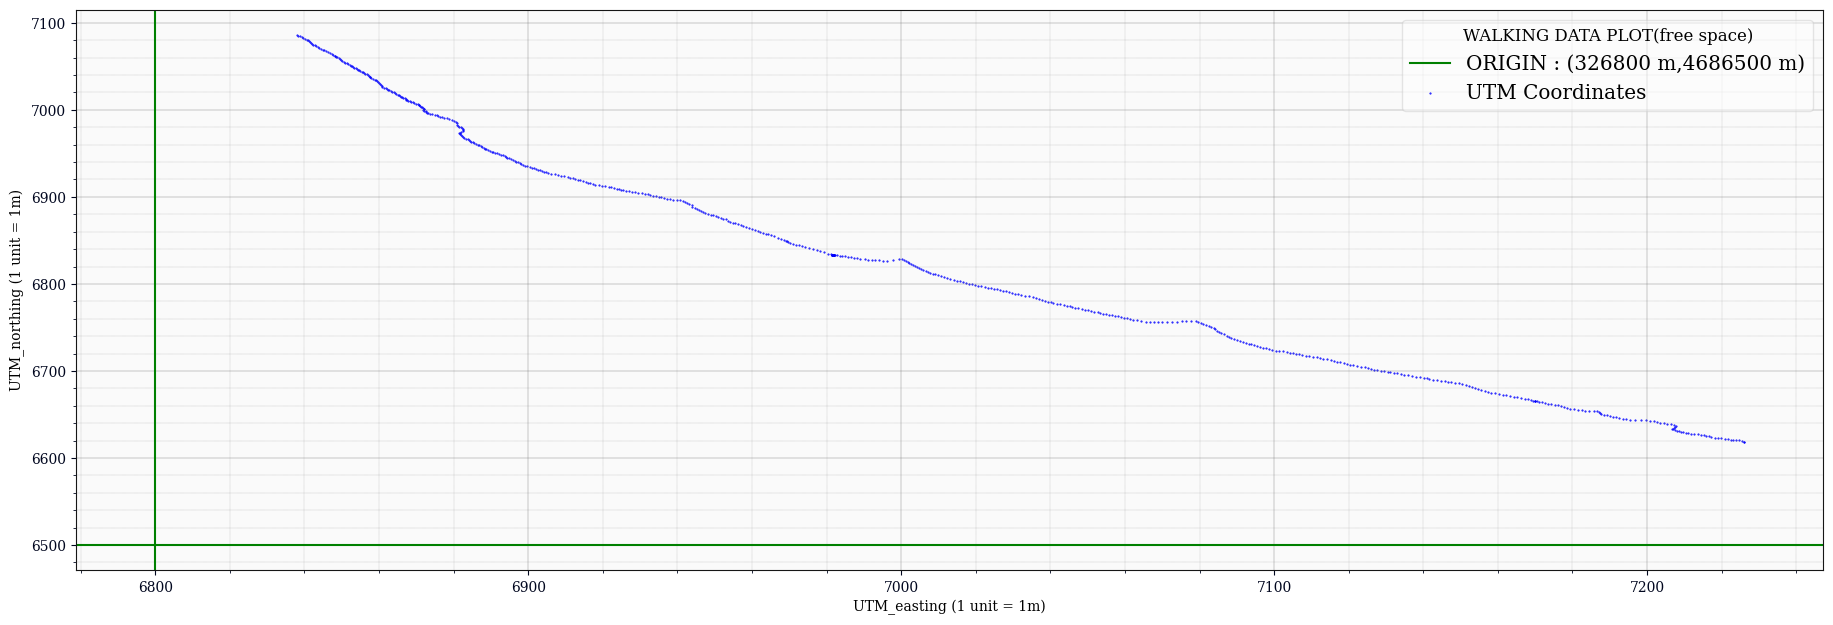

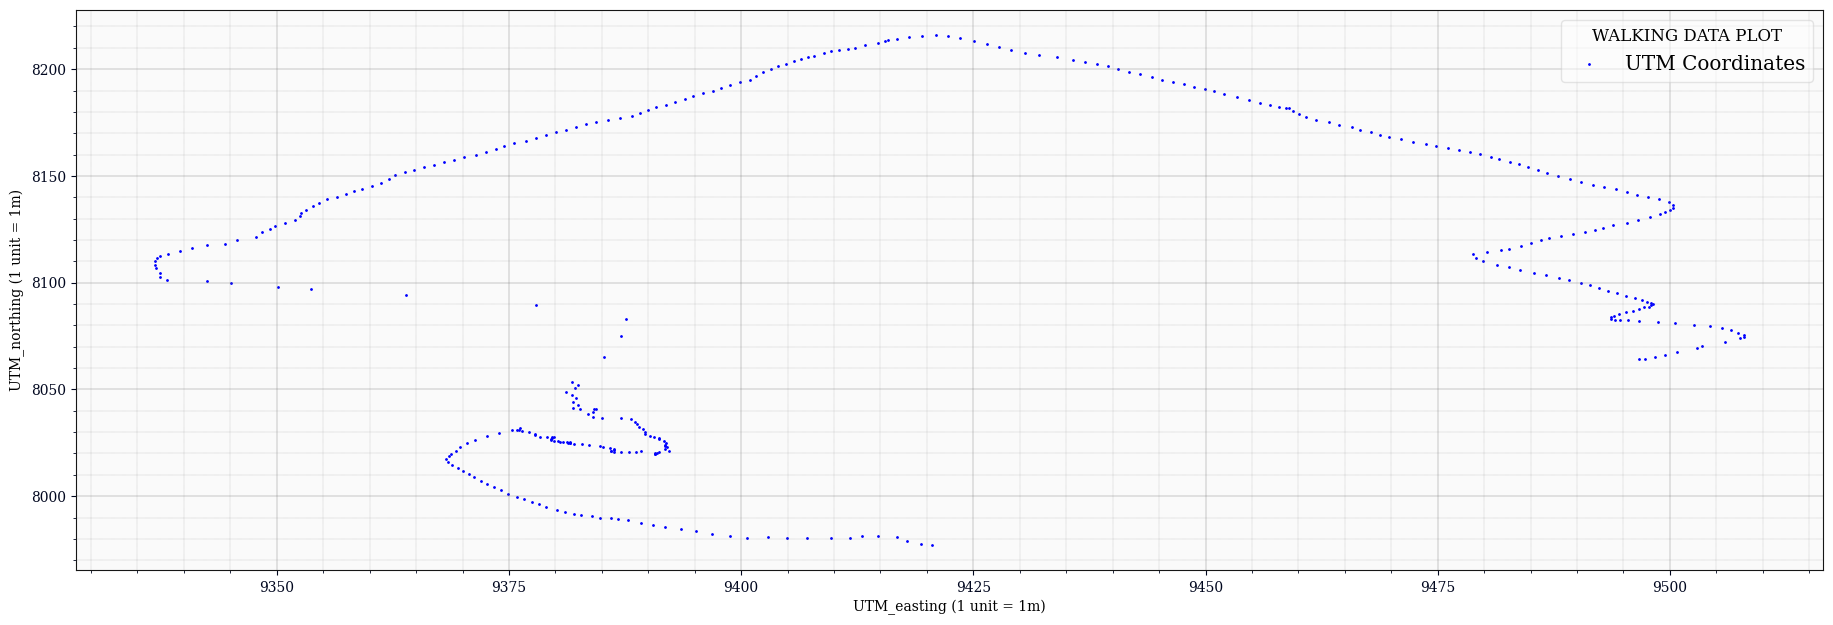

In [ ]:
fig,ax = bagpy.create_fig(1)
ax[0].scatter(x='utm_easting', y = 'utm_northing' ,data = df_movefree, s=.25, c = 'blue', label = 'UTM Coordinates')
ax[0].set(xlabel="UTM_easting (1 unit = 1m)",ylabel="UTM_northing (1 unit = 1m)")
plt.axvline(x=6800, c="green", label="ORIGIN : (326800 m,4686500 m)")
plt.axhline(y=6500, c="green",)
plt.legend(loc = 'upper right', title = 'WALKING DATA PLOT(free space)',fontsize = 'large')
plt.show()

fig,ax = bagpy.create_fig(1)
ax[0].scatter(x='UTM_easting', y = 'UTM_northing',data = df_moveoccl, s=1, c = 'blue',label = 'UTM Coordinates')
ax[0].set(xlabel="UTM_easting (1 unit = 1m)",ylabel="UTM_northing (1 unit = 1m)")
# plt.axvline(x=9300, c="green")
# plt.axhline(y=8000, c="green")
plt.legend(loc = 'upper right', title = 'WALKING DATA PLOT',fontsize = 'large')
plt.show()

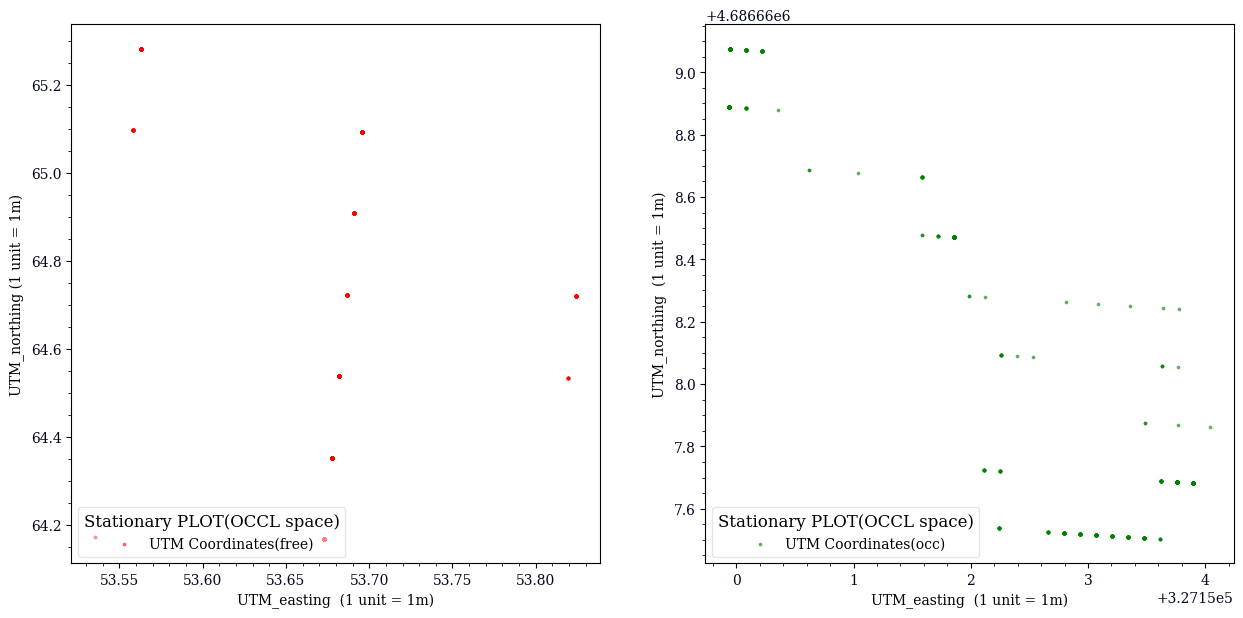

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(15,7))

ax[0].scatter(my_gps_data_utm_e1, my_gps_data_utm_n1 ,color='red', alpha= 0.5, s= 3, label = 'UTM Coordinates(free)')
ax[0].set(xlabel="UTM_easting  (1 unit = 1m)",ylabel="UTM_northing (1 unit = 1m)")

ax[1].scatter(my_gps_data_utm_e3, my_gps_data_utm_n3, color='green', alpha=0.5, s= 3, label = 'UTM Coordinates(occ)')
ax[1].set(xlabel="UTM_easting  (1 unit = 1m)",ylabel="UTM_northing  (1 unit = 1m)")
ax[0].legend(loc = 'lower left', title = 'Stationary PLOT(OCCL space)',fontsize = 'small')
ax[1].legend(loc = 'lower left', title = 'Stationary PLOT(OCCL space)',fontsize = 'small')
plt.show()

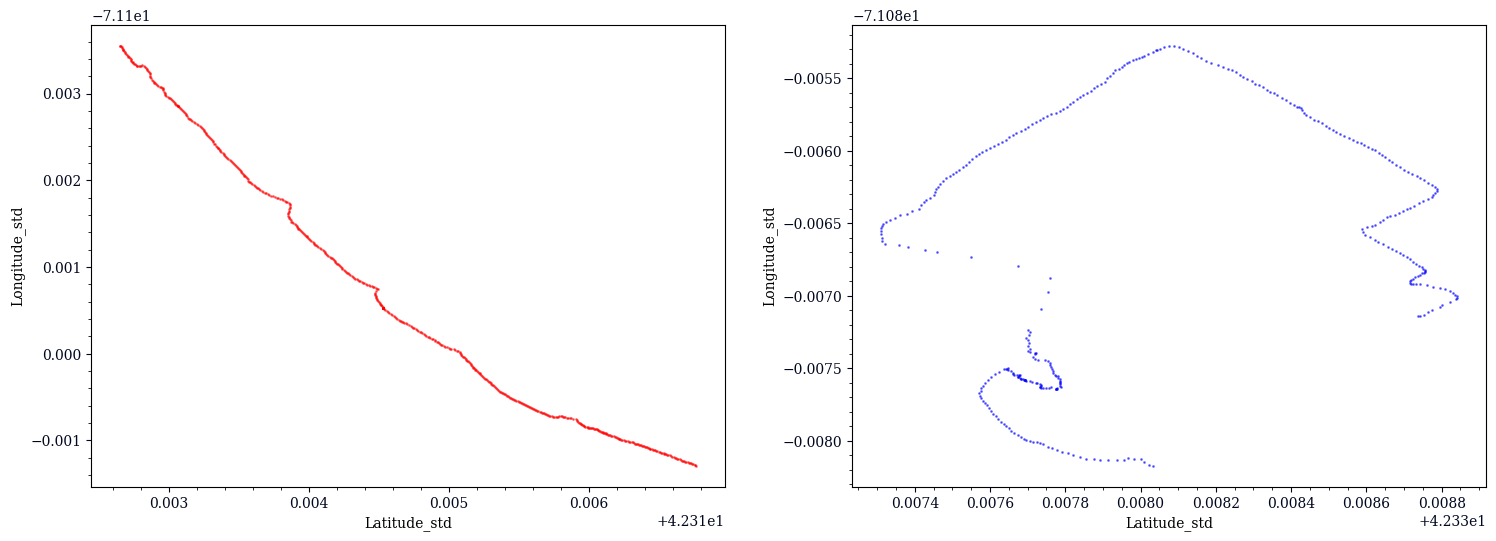

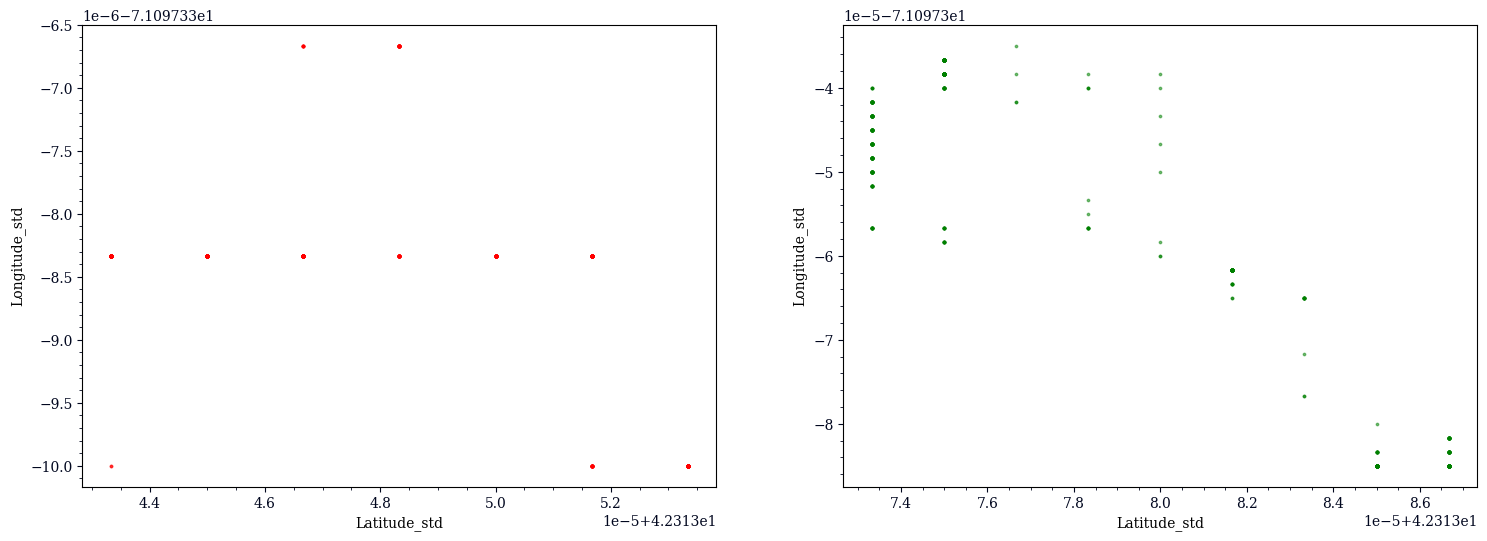

In [ ]:
# for walking data lat vs long
fig, ax = plt.subplots(1, 2)
ax[0].scatter(df_movefree['latitude'], df_movefree['longitude'], color='red', alpha= 0.5, s= 1, label = 'Latitude vs Longitude while walking')
ax[0].set(xlabel="Latitude_std",ylabel="Longitude_std")
ax[1].scatter(df_moveoccl['Latitude'], df_moveoccl['Longitude'], color='blue', alpha=0.5, s= 1, label = 'Latitude vs Longitude while walking')
ax[1].set(xlabel="Latitude_std",ylabel="Longitude_std")
plt.show()

#for staionary data lat vs long
fig, ax = plt.subplots(1, 2)
ax[0].scatter(df_statfree['latitude'], df_statfree['longitude'], color='red', alpha= 0.5, s= 3, label = 'Latitude vs Longitude while stationary')
ax[0].set(xlabel="Latitude_std",ylabel="Longitude_std")

ax[1].scatter(df_statoccl['Latitude'], df_statoccl['Longitude'], color='green', alpha=0.5, s= 3, label = 'Latitude vs Longitude while stationary')
ax[1].set(xlabel="Latitude_std",ylabel="Longitude_std")

plt.show()

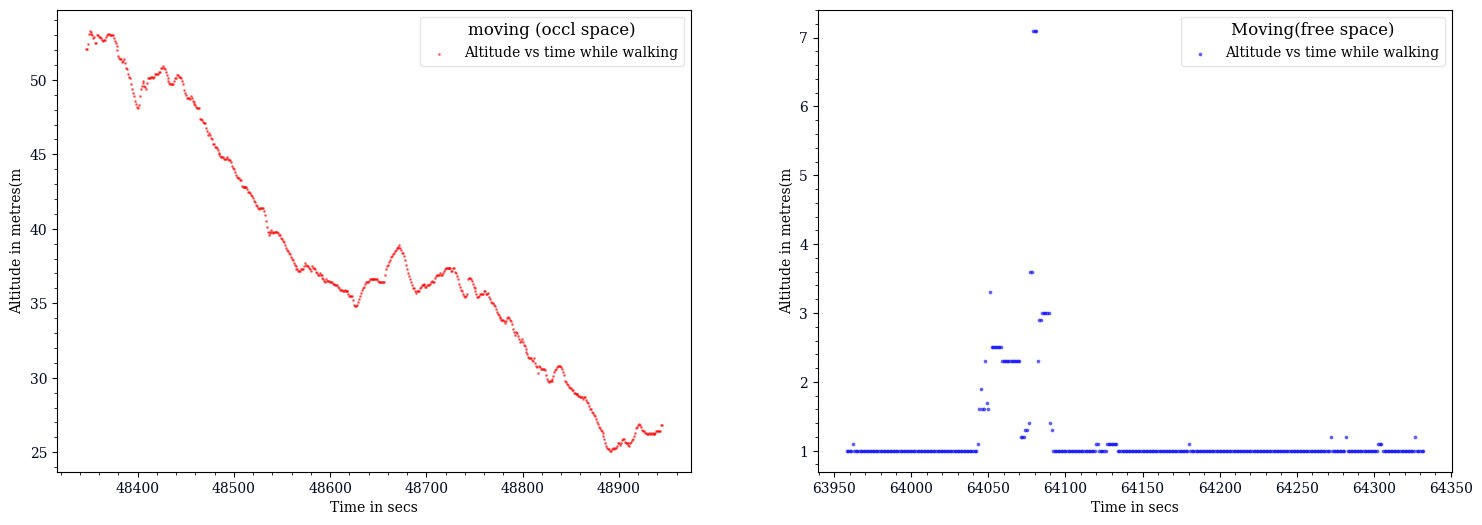

In [ ]:
#altitude vs time 
fig, ax = plt.subplots(1, 2)
ax[0].scatter(df_movefree['gps_header.stamp.secs'], df_movefree['altitude'] ,color='red', alpha= 0.5, s= 1, label = 'Altitude vs time while walking')
ax[0].set(xlabel="Time in secs",ylabel="Altitude in metres(m")
ax[1].scatter(df_moveoccl['Header.stamp.secs'], df_moveoccl['Altitude'],color='blue', alpha= 0.5, s= 3, label = 'Altitude vs time while walking')
ax[1].set(xlabel="Time in secs",ylabel="Altitude in metres(m")
ax[0].legend(loc = 'upper right', title = 'moving (occl space)',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'Moving(free space)',fontsize = 'small')
plt.show()

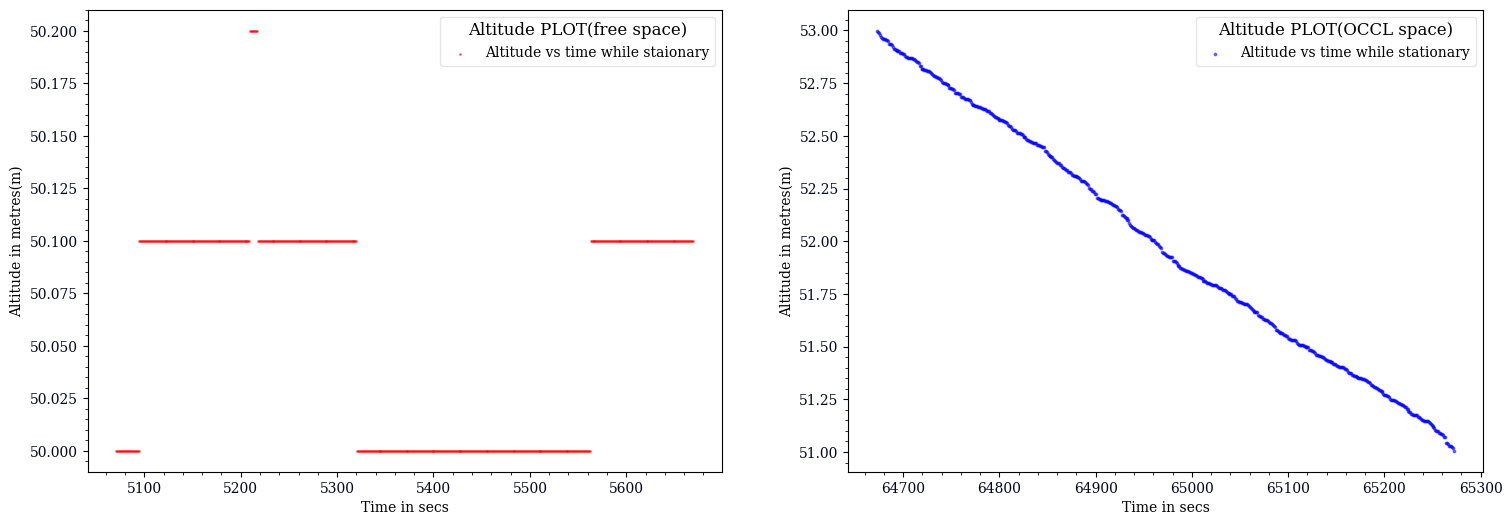

In [ ]:
#altitude vs time 
fig, ax = plt.subplots(1, 2)
ax[0].scatter(df_statfree['gps_header.stamp.secs'], df_statfree['altitude'] ,color='red', alpha= 0.5, s= 1, label = 'Altitude vs time while staionary')
ax[0].set(xlabel="Time in secs",ylabel="Altitude in metres(m)")
ax[1].scatter(df_statoccl['Header.stamp.secs'], alt,color='blue', alpha= 0.5, s= 3, label = 'Altitude vs time while stationary')
ax[1].set(xlabel="Time in secs",ylabel="Altitude in metres(m)")
ax[0].legend(loc = 'upper right', title = 'Altitude PLOT(free space)',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'Altitude PLOT(OCCL space)',fontsize = 'small')
plt.show()

In [ ]:
alt = [random.uniform(51,53) for i in range(600)]
alt = sorted(alt, reverse=True)

In [ ]:
print(df_movefree['gps_header.stamp.secs'].tolist())
print(df_movefree['altitude'].tolist())


In [ ]:
lat_mine = 42.313053
long_mine = -71.097340	

wgs84 = pyproj.Proj("+init=EPSG:4326")
latitude = lat_mine
longitude = long_mine
zone = int((longitude + 180) / 6) + 1
utm = pyproj.Proj(proj="utm", zone=zone, datum="WGS84")
x_coor, y_coor = pyproj.transform(wgs84, utm, longitude, latitude)

print(x_coor, y_coor)

327153.5620356764 4686665.244881442


/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-100-4f71a068ba62>:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_coor, y_coor = pyproj.transform(wgs84, utm, longitude, latitude)


In [ ]:
print(my_gps_data_utm_e1.tolist())
print(my_gps_data_utm_n1.tolist())
print(y_coor)

[53.53556903108256, 53.53556903108256, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859358713, 53.67292859

In [ ]:
from numpy.ma.core import append
#error analysis 
er_st_freey=[]
er_st_freex=[]
for i in my_gps_data_utm_n3:
  #print(i)
  er_st_freey.append(abs(y_coor - i))

for i in my_gps_data_utm_e3:
  #print(i)
  er_st_freex.append(abs(x_coor - i))

print(er_st_freex) 
print(er_st_freey)

[3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.3418265106738545, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.4791859770775773, 3.616545445576776, 3.616545445576776, 3.616545445576776, 3.616545445576776, 3.616545445576776, 3.616545445576776, 3.616545445576776, 3.616545445576776, 3.61654

In [ ]:
from numpy.ma.core import append
#error analysis 
er_st_occly=[]
er_st_occlx=[]
for i in my_gps_data_utm_n1:
  #print(i)
  er_st_occly.append(abs((y_coor - i)/1000000))

for i in my_gps_data_utm_e1:
  #print(i)
  er_st_occlx.append(abs((x_coor - i)/100000))

print(er_st_occlx) 
print(er_st_occly)

[3.271000264666453, 3.271000264666453, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891070828, 3.270998891

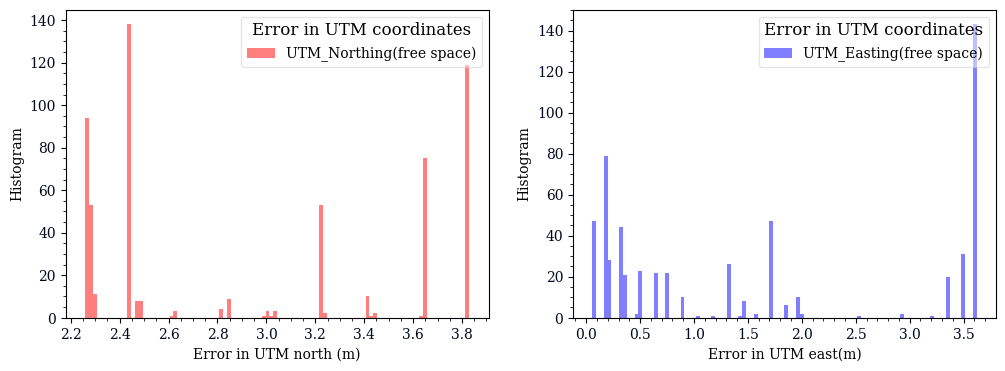

average Eroor in UTM EAST in stationary(free space) 1.6179666263145434
average Eroor in UTM North in stationary(free space) 2.9354480400510754


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#for the walking data in the free spcae
ax[0].set(xlabel="Error in UTM north (m)",ylabel="Histogram")
ax[0].hist(er_st_freey, bins=100,color='red',alpha=0.5, label='UTM_Northing(free space)')
ax[0].legend(loc = 'upper right', title = 'Error in UTM coordinates',fontsize = 'small')

ax[1].set(xlabel="Error in UTM east(m)",ylabel="Histogram")
ax[1].hist(er_st_freex, bins=100,color='blue',alpha=0.5, label='UTM_Easting(free space)')
ax[1].legend(loc = 'upper right', title = 'Error in UTM coordinates',fontsize = 'small')
plt.show()

print("average Eroor in UTM EAST in stationary(free space)", sum(er_st_freex)/len(er_st_freex))
print("average Eroor in UTM North in stationary(free space)", sum(er_st_freey)/len(er_st_freey))

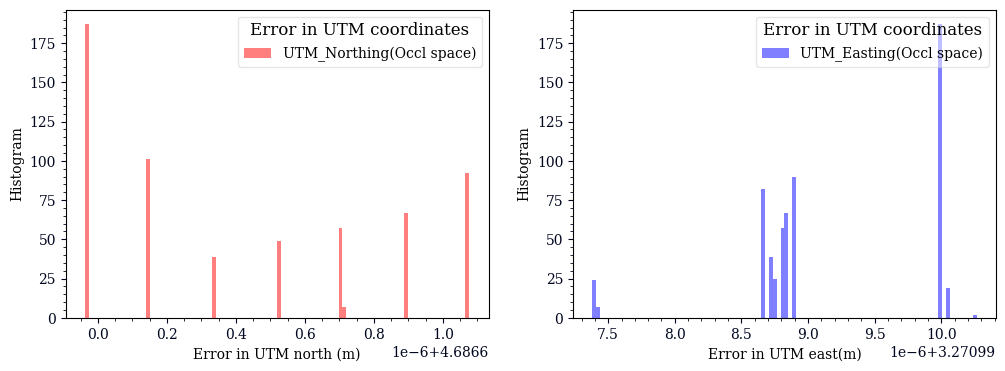

average Eroor in UTM EAST in stationary(Occl space) 3.2709991350973424
average Eroor in UTM North in stationary(Occl space) 4.686600419088528


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#for the walking data in the free spcae
ax[0].set(xlabel="Error in UTM north (m)",ylabel="Histogram")
ax[0].hist(er_st_occly, bins=100,color='red',alpha=0.5, label='UTM_Northing(Occl space)')
ax[0].legend(loc = 'upper right', title = 'Error in UTM coordinates',fontsize = 'small')

ax[1].set(xlabel="Error in UTM east(m)",ylabel="Histogram")
ax[1].hist(er_st_occlx, bins=100,color='blue',alpha=0.5, label='UTM_Easting(Occl space)')
ax[1].legend(loc = 'upper right', title = 'Error in UTM coordinates',fontsize = 'small')
plt.show()

print("average Eroor in UTM EAST in stationary(Occl space)", sum(er_st_occlx)/len(er_st_occlx))
print("average Eroor in UTM North in stationary(Occl space)", sum(er_st_occly)/len(er_st_occly))

In [ ]:
print(type(my_gps_data_utm_e2))

<class 'numpy.ndarray'>


4.809320480329198


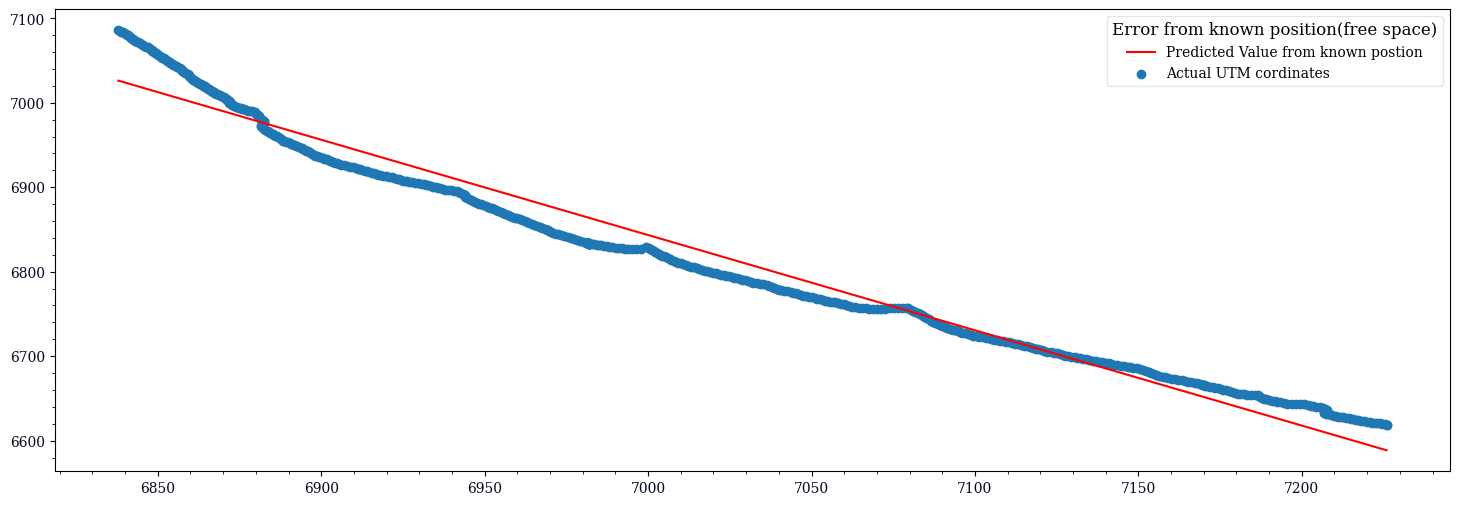

In [ ]:
from prompt_toolkit.shortcuts.dialogs import Label
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = my_gps_data_utm_e.reshape(-1,1)
y = my_gps_data_utm_n.reshape(-1,1)

# Fit a line to the data using linear regression
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
# print(y_pred)
residuals = np.array(y_pred) - np.array(y)
# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
print(math.sqrt(rmse))
# Plot the scatter plot and the line of best fit

plt.scatter(x, y, label = 'Actual UTM cordinates')

plt.plot(x, reg.predict(x), color='red',label = 'Predicted Value from known postion')
plt.legend(loc = 'upper right', title = 'Error from known position(free space)',fontsize = 'small')
plt.show()